In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Loading dataset
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
# Checking dataset Information
dataset.info()
print("Null values:\n", dataset.isnull().sum())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
Null values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
# Counting gender and smoking history
print("Gender counts:\n", dataset['gender'].value_counts())
print("Smoking History counts:\n", dataset['smoking_history'].value_counts())

Gender counts:
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
Smoking History counts:
 smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [8]:
dataset = pd.get_dummies(dataset, columns=['gender', 'smoking_history'], drop_first=True)

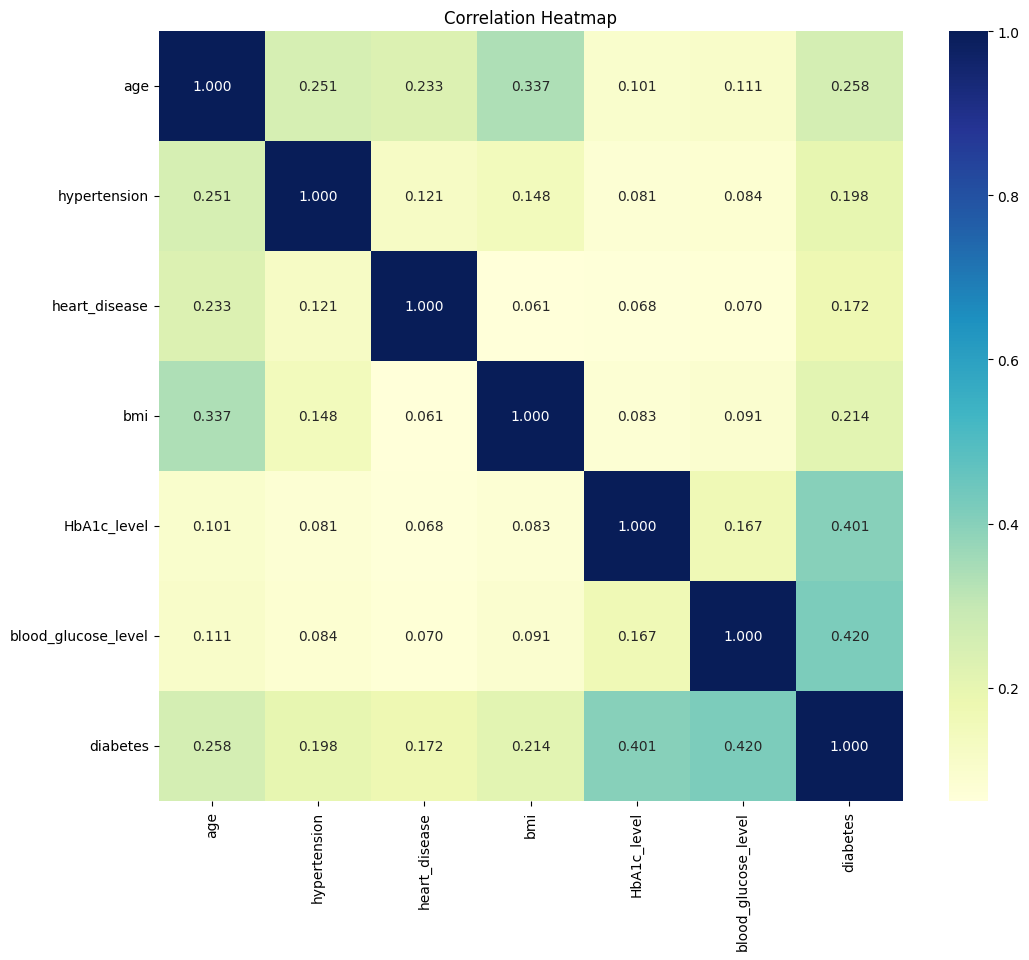

In [9]:
numeric_data = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

Diabetes counts:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


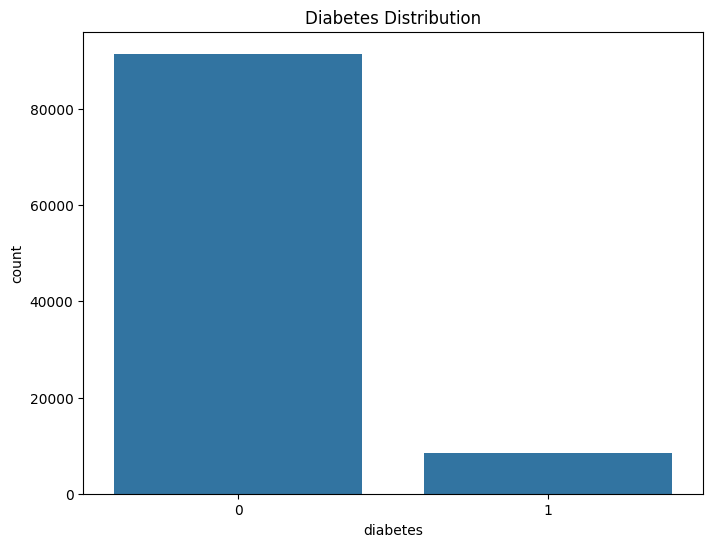

In [10]:
# Plotting diabetes distribution
print("Diabetes counts:\n", dataset['diabetes'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=dataset)
plt.title('Diabetes Distribution')
plt.show()

In [11]:
# Separating features (X) and target (y) for model training
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print(f"KNN Train Accuracy: {knn.score(X_train_scaled, y_train):.3f}")
print(f"KNN Test Accuracy: {knn.score(X_test_scaled, y_test):.3f}")

KNN Train Accuracy: 0.969
KNN Test Accuracy: 0.960


In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train_scaled, y_train)
print(f"DT Train Accuracy: {dt.score(X_train_scaled, y_train):.3f}")
print(f"DT Test Accuracy: {dt.score(X_test_scaled, y_test):.3f}")

DT Train Accuracy: 0.972
DT Test Accuracy: 0.972


In [14]:
# Creating prediction function
def predict_diabetes(new_patient_data):
    new_patient_df = pd.DataFrame([new_patient_data], columns=X.columns)
    new_patient_scaled = sc.transform(new_patient_df)
    prediction = knn.predict(new_patient_scaled)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

In [15]:
new_patient = {
    'age': 60,
    'hypertension': 1,
    'heart_disease': 1,
    'bmi': 32,
    'HbA1c_level': 7.5,
    'blood_glucose_level': 200,
    'gender_Male': 1,  # Male
    'gender_Other': 0,
    'smoking_history_current': 1,
    'smoking_history_ever': 0,
    'smoking_history_former': 0,
    'smoking_history_never': 0,
    'smoking_history_not current': 0
}
print("Prediction:", predict_diabetes(new_patient))

Prediction: Diabetic


In [17]:
new_patient = {
    'age': 30,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 21,
    'HbA1c_level': 5.0,
    'blood_glucose_level': 85,
    'gender_Male': 0,  #Female
    'gender_Other': 0,
    'smoking_history_current': 0,
    'smoking_history_ever': 0,
    'smoking_history_former': 0,
    'smoking_history_never': 1,
    'smoking_history_not current': 0
}
print("Prediction:", predict_diabetes(new_patient))

Prediction: Non-Diabetic


In [18]:
new_patient = {
    'age': 40,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 23,
    'HbA1c_level': 5.2,
    'blood_glucose_level': 95,
    'gender_Male': 1,  #Male
    'gender_Other': 0,
    'smoking_history_current': 0,
    'smoking_history_ever': 0,
    'smoking_history_former': 0,
    'smoking_history_never': 1,
    'smoking_history_not current': 0
}
print("Prediction:", predict_diabetes(new_patient))

Prediction: Non-Diabetic
